In [1]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

C:\Users\FLORENCIA\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\FLORENCIA\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\FLORENCIA\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\FLORENCIA\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
# read csv file, use date as index and read close as a column
#symbol='TTD'
#dataset = pd.read_csv('~/Data/{}.csv'.format(symbol))
dataset = pd.read_csv('~/Dropbox/KLACmod.csv')
# rename the column header with symbol name
dataset = dataset.drop(columns=['Price_Rise'])
#dataset = dataset[['open', 'high', 'low', 'close']]

In [3]:
dataset

,date,open,open_1,close_1,high_1,low_1,volume_1,H-L,O-C,avg_price_5,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
0,2015-01-22,69.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.95
1,2015-01-23,66.58,69.49,70.95,71.13,68.68,2274474.0,2.45,1.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.24
2,2015-01-26,64.88,66.58,65.24,67.50,65.12,5466770.0,2.38,-1.34,NaN,...,NaN,NaN,-0.080479,NaN,NaN,NaN,NaN,NaN,NaN,65.44
3,2015-01-27,63.86,64.88,65.44,65.70,64.18,3084662.0,1.52,0.56,NaN,...,NaN,NaN,0.003066,NaN,NaN,NaN,NaN,NaN,NaN,63.34
4,2015-01-28,64.01,63.86,63.34,64.18,63.01,2535142.0,1.17,-0.52,NaN,...,NaN,NaN,-0.032090,NaN,NaN,NaN,NaN,NaN,NaN,62.76
5,2015-01-29,62.53,64.01,62.76,64.44,62.74,1701668.0,1.70,-1.25,65.546,...,NaN,NaN,-0.009157,NaN,NaN,NaN,NaN,NaN,NaN,63.39
6,2015-01-30,62.41,62.53,63.39,63.57,62.11,1281010.0,1.46,0.86,64.034,...,NaN,NaN,0.010038,-0.106554,NaN,NaN,NaN,NaN,NaN,61.47
7,2015-02-02,61.42,62.41,61.47,63.40,61.34,1631606.0,2.06,-0.94,63.280,...,NaN,NaN,-0.030289,-0.057787,NaN,NaN,-0.021725,NaN,NaN,61.87
8,2015-02-03,62.03,61.42,61.87,62.10,60.21,1434221.0,1.89,0.45,62.566,...,NaN,NaN,0.006507,-0.054554,NaN,NaN,-0.011686,NaN,NaN,63.47
9,2015-02-04,63.41,62.03,63.47,63.54,61.92,1482920.0,1.62,1.44,62.592,...,NaN,NaN,0.025861,0.002052,NaN,NaN,-0.010998,NaN,NaN,63.16


dataset['Price_Rise'] = np.where(dataset['close'] > dataset['close'].shift(1), 1, 0)


In [4]:

#We then define the output value as price rise, which is a binary variable storing 1 when the closing price of tomorrow is greater than the closing price of today.
dataset['Price_Rise'] = np.where(dataset['close'] > dataset['close'].shift(1), 1, 0)


In [5]:
dataset = dataset.dropna()

In [6]:
#we remove all OHLC data from “dataset” and keep only “8 input features” and “Output” in a new data frame named as “data”.
#del data
data = dataset.copy()

In [7]:
data.set_index('date', inplace=True)

In [8]:
#Next, we make all data in data a np.array.

# Dimensions of data
n = data.shape[0]
p = data.shape[1]
# Make data a np.array
data = data.values

In [9]:
len(data)

1004

In [10]:
# Splitting the dataset- Training and test data
train_start = 0
train_end = int(np.floor(0.90*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [11]:
# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)



We then spit the train and test data set in to X_train, y_train & X_test, y_test. This selects the target and predictors from data_train and data_test. The target which is price rise (y_train & y_test) is located in the last column of data_train/test, the predictors which 8 features (X_train & X_test) from 1st column to 8th column data_train/test. The whole data set will look like below.



In [12]:
# Build X and y
X_train = data_train[:, 0:-1]
y_train = data_train[:, -1]
X_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

In [13]:
y_test

array([ 1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.])

Building The Artificial Neural Network
Input, Hidden & Output Layers
The model consists of three major building blocks. The input layer, the hidden layers and the output layer. The input layer is the x features. After input layers there are 3 hidden layers. The first hidden layer contains 512 neurons. Subsequent hidden layers are always half the size of the previous layer, which means 2nd hidden layers contains 256 and finally 3rd one 128 neurons. After 3 hidden layers there is output layer. Net is creating by tensor flow interactive secession.

In [14]:
# Number of features in training data
n_features = X_train.shape[1]
n_features

40

In [15]:
# Neurons
n_neurons_1 = 512
n_neurons_2 = 256
n_neurons_3 = 128

# Session
net = tf.InteractiveSession()




In [16]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [17]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [18]:
# Hidden weights:
#Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_features, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
#Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
#Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

In [19]:
# Output weights:
#Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_3, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [20]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))

In [21]:
# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_3, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [22]:
# Run initializer
net.run(tf.global_variables_initializer())

In [23]:
# Fitting the neural network
batch_size = 100
epochs = 10
# Run
for e in range(epochs):
    # Shuffle training data
    shuffle_data = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_data]
    y_train = y_train[shuffle_data]
    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        

In [24]:
#Predicting the movement of the stock
pred = net.run(out, feed_dict={X: X_test})
y_pred = pred[0]
y_pred = pred[0] > 0.5

dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()


C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\FLORENCIA\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
trade_dataset

,date,open,open_1,close_1,high_1,low_1,volume_1,H-L,O-C,avg_price_5,...,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close,Price_Rise,y_pred
1238,2019-12-20,176.82,175.70,175.46,176.22,172.86,1187773.0,3.36,-0.24,173.996,...,0.001141,0.023329,-0.003012,1.018173,0.009633,-0.000199,0.002857,177.47,1,False
1239,2019-12-23,178.86,176.82,177.47,177.84,174.97,2695150.0,2.87,0.65,175.242,...,0.011456,0.036382,0.021881,1.066007,0.004667,0.000127,0.002998,177.11,0,False
1240,2019-12-24,177.79,178.86,177.11,179.24,176.90,969098.0,2.34,-1.75,176.252,...,-0.002029,0.029350,0.096046,1.067351,0.007215,0.001300,0.003091,178.11,1,False
1241,2019-12-26,178.58,177.79,178.11,178.19,176.28,257681.0,1.91,0.32,176.682,...,0.005646,0.012219,0.123793,1.192663,0.005851,0.004516,0.003093,178.75,1,False
1242,2019-12-27,179.25,178.58,178.75,178.80,177.14,527880.0,1.66,0.17,177.380,...,0.003593,0.019913,0.094276,1.077281,0.002447,0.005698,0.003321,178.52,0,False
1243,2019-12-30,178.02,179.25,178.52,179.71,177.36,553906.0,2.35,-0.73,177.992,...,-0.001287,0.017440,0.101092,1.021744,0.003962,0.004409,0.003100,178.37,0,False
1244,2019-12-31,177.39,178.02,178.37,178.92,175.23,756432.0,3.69,0.35,178.172,...,-0.000840,0.005071,0.076788,1.012524,0.003476,0.004704,0.002991,178.17,0,False
1245,2020-01-02,180.78,177.39,178.17,178.51,176.30,869378.0,2.21,0.78,178.384,...,-0.001121,0.005985,0.087331,0.990949,0.001017,0.003630,0.002973,182.57,1,False
1246,2020-01-03,179.33,180.78,182.57,182.70,180.02,1005598.0,2.68,1.79,179.276,...,0.024696,0.025041,0.133553,1.008250,0.001198,0.004091,0.002930,179.08,0,False
1247,2020-01-06,176.32,179.33,179.08,181.17,177.86,833408.0,3.31,-0.25,179.342,...,-0.019116,0.001846,0.145159,1.086936,0.005008,0.006081,0.002965,175.05,0,False


In [26]:
#Computing Strategy Returns
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))


C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,open,open_1,close_1,high_1,low_1,volume_1,H-L,O-C,avg_price_5,...,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close,Price_Rise,y_pred,Tomorrows Returns
1238,2019-12-20,176.82,175.70,175.46,176.22,172.86,1187773.0,3.36,-0.24,173.996,...,0.023329,-0.003012,1.018173,0.009633,-0.000199,0.002857,177.47,1,False,NaN
1239,2019-12-23,178.86,176.82,177.47,177.84,174.97,2695150.0,2.87,0.65,175.242,...,0.036382,0.021881,1.066007,0.004667,0.000127,0.002998,177.11,0,False,-0.002031
1240,2019-12-24,177.79,178.86,177.11,179.24,176.90,969098.0,2.34,-1.75,176.252,...,0.029350,0.096046,1.067351,0.007215,0.001300,0.003091,178.11,1,False,0.005630
1241,2019-12-26,178.58,177.79,178.11,178.19,176.28,257681.0,1.91,0.32,176.682,...,0.012219,0.123793,1.192663,0.005851,0.004516,0.003093,178.75,1,False,0.003587
1242,2019-12-27,179.25,178.58,178.75,178.80,177.14,527880.0,1.66,0.17,177.380,...,0.019913,0.094276,1.077281,0.002447,0.005698,0.003321,178.52,0,False,-0.001288
1243,2019-12-30,178.02,179.25,178.52,179.71,177.36,553906.0,2.35,-0.73,177.992,...,0.017440,0.101092,1.021744,0.003962,0.004409,0.003100,178.37,0,False,-0.000841
1244,2019-12-31,177.39,178.02,178.37,178.92,175.23,756432.0,3.69,0.35,178.172,...,0.005071,0.076788,1.012524,0.003476,0.004704,0.002991,178.17,0,False,-0.001122
1245,2020-01-02,180.78,177.39,178.17,178.51,176.30,869378.0,2.21,0.78,178.384,...,0.005985,0.087331,0.990949,0.001017,0.003630,0.002973,182.57,1,False,0.024396
1246,2020-01-03,179.33,180.78,182.57,182.70,180.02,1005598.0,2.68,1.79,179.276,...,0.025041,0.133553,1.008250,0.001198,0.004091,0.002930,179.08,0,False,-0.019301
1247,2020-01-06,176.32,179.33,179.08,181.17,177.86,833408.0,3.31,-0.25,179.342,...,0.001846,0.145159,1.086936,0.005008,0.006081,0.002965,175.05,0,False,-0.022761


In [27]:
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, 
             trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\FLORENCIA\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [29]:
trade_dataset.shape

(20, 47)

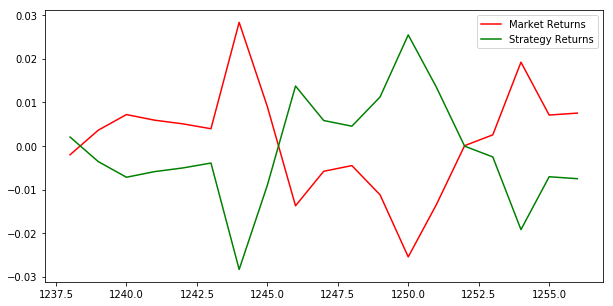

In [30]:
#Plotting the graph of returns
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [32]:
trade_dataset


,date,open,open_1,close_1,high_1,low_1,volume_1,H-L,O-C,avg_price_5,...,moving_avg_5,moving_avg_30,moving_avg_365,close,Price_Rise,y_pred,Tomorrows Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
1238,2019-12-20,176.82,175.70,175.46,176.22,172.86,1187773.0,3.36,-0.24,173.996,...,0.009633,-0.000199,0.002857,177.47,1,False,-0.002031,0.002031,-0.002031,0.002031
1239,2019-12-23,178.86,176.82,177.47,177.84,174.97,2695150.0,2.87,0.65,175.242,...,0.004667,0.000127,0.002998,177.11,0,False,0.005630,-0.005630,0.003600,-0.003600
1240,2019-12-24,177.79,178.86,177.11,179.24,176.90,969098.0,2.34,-1.75,176.252,...,0.007215,0.001300,0.003091,178.11,1,False,0.003587,-0.003587,0.007187,-0.007187
1241,2019-12-26,178.58,177.79,178.11,178.19,176.28,257681.0,1.91,0.32,176.682,...,0.005851,0.004516,0.003093,178.75,1,False,-0.001288,0.001288,0.005899,-0.005899
1242,2019-12-27,179.25,178.58,178.75,178.80,177.14,527880.0,1.66,0.17,177.380,...,0.002447,0.005698,0.003321,178.52,0,False,-0.000841,0.000841,0.005058,-0.005058
1243,2019-12-30,178.02,179.25,178.52,179.71,177.36,553906.0,2.35,-0.73,177.992,...,0.003962,0.004409,0.003100,178.37,0,False,-0.001122,0.001122,0.003937,-0.003937
1244,2019-12-31,177.39,178.02,178.37,178.92,175.23,756432.0,3.69,0.35,178.172,...,0.003476,0.004704,0.002991,178.17,0,False,0.024396,-0.024396,0.028332,-0.028332
1245,2020-01-02,180.78,177.39,178.17,178.51,176.30,869378.0,2.21,0.78,178.384,...,0.001017,0.003630,0.002973,182.57,1,False,-0.019301,0.019301,0.009031,-0.009031
1246,2020-01-03,179.33,180.78,182.57,182.70,180.02,1005598.0,2.68,1.79,179.276,...,0.001198,0.004091,0.002930,179.08,0,False,-0.022761,0.022761,-0.013730,0.013730
1247,2020-01-06,176.32,179.33,179.08,181.17,177.86,833408.0,3.31,-0.25,179.342,...,0.005008,0.006081,0.002965,175.05,0,False,0.007909,-0.007909,-0.005821,0.005821
